In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pylab as pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [5]:
cd "C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\FSU 2022-2023\QIIME2_Indian_Diebetes_study\Visualization"

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\FSU 2022-2023\QIIME2_Indian_Diebetes_study\Visualization


In [6]:
df1 = pd.read_csv('diversity.csv')
df1

,Site,Group,PC1,PC2,observed_features,shannon_entropy,chao1
0,M_006,Control,-0.034129,-0.023576,168,6.280314,168
1,M_110,Control,-0.402126,0.317293,138,3.747634,138
2,M_113,Control,-0.003571,-0.031003,184,6.149568,185
3,M_122,Control,-0.025648,-0.010857,254,6.863916,254
4,M_125,Control,-0.003597,-0.056128,231,6.827470,231
...,...,...,...,...,...,...,...
88,M_210,Unknown_Diabetics,-0.019139,-0.062993,137,5.536954,137
89,M_229,Unknown_Diabetics,0.415929,0.245728,79,3.811334,79
90,M_278,Unknown_Diabetics,0.423491,0.261156,117,3.953448,117
91,M_282,Unknown_Diabetics,-0.002343,-0.004071,328,7.351552,330


In [7]:
colors = ["#545454","#ffaa00","#c90000","#0d6570"]
sns.set_palette(sns.color_palette(colors))

<IPython.core.display.Javascript object>


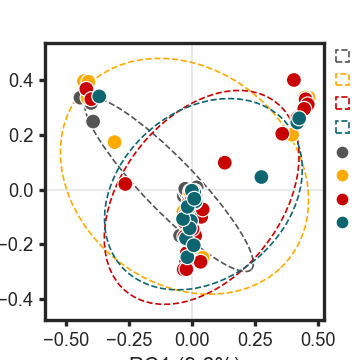

In [19]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

fig.set_size_inches(3,3)

ax.axvline(c='grey', alpha=0.2, lw=1)
ax.axhline(c='grey', alpha=0.2, lw=1)

In [20]:
A = df1[df1['Group'] == 'Control']
B = df1[df1['Group'] == 'Pre_Diabetics']
C = df1[df1['Group'] == 'Known_Diabetics']
D = df1[df1['Group'] == 'Unknown_Diabetics']

confidence_ellipse(x=A["PC1"], y=A["PC2"], ax=ax, n_std=2, 
                   label='Control', edgecolor='#545454', zorder=1, alpha=1, linestyle='dashed')
confidence_ellipse(x=B["PC1"], y=B["PC2"], ax=ax, n_std=2, 
                   label='Pre_Diabetics', edgecolor='#ffaa00', zorder=1, alpha=1, linestyle='dashed')
confidence_ellipse(x=C["PC1"], y=C["PC2"], ax=ax, n_std=2, 
                   label='Known_Diabetics', edgecolor='#c90000', zorder=1, alpha=1, linestyle='dashed')
confidence_ellipse(x=D["PC1"], y=D["PC2"], ax=ax, n_std=2, 
                   label='Unknown_Diabetics', edgecolor='#0d6570', zorder=1, alpha=1, linestyle='dashed')

sns.scatterplot(data=df1, x="PC1", y="PC2", ax=ax, hue="Group", palette=colors, s=80, zorder=5)

plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

plt.xlabel("PC1 (9.6%)",size=13)
plt.ylabel("PC2 (8.3%)",size=13)
plt.title("", size=15)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, fontsize=10, handlelength=0.75,
           facecolor="white", edgecolor="white")

plt.savefig("Beta-diversity-all.svg", bbox_inches='tight') 

C:\Users\Gwoncheol\AppData\Local\Temp\ipykernel_2740\1221586478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1["Group"], y=df1["observed_features"], palette=colors, width=0.75, linewidth=1.5, errorbar=("sd"),
C:\Users\Gwoncheol\AppData\Local\Temp\ipykernel_2740\1221586478.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=df1, x=df1["Group"], y=df1["observed_features"], palette=colors, width=0.75, linewidth=1.5, errorbar=("sd"),


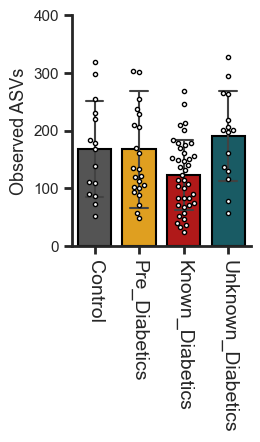

In [10]:
%matplotlib inline
sns.set_style("white")
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
fig.set_size_inches(2.3,3)

sns.set(font_scale=1.2)

sns.barplot(data=df1, x=df1["Group"], y=df1["observed_features"], palette=colors, width=0.75, linewidth=1.5, errorbar=("sd"),
           capsize=0.4, edgecolor="Black", errwidth=1.5)

sns.swarmplot(x=df1["Group"], y=df1["observed_features"], data=df1, color="white", size=3, ax=ax1, edgecolor="black", linewidth=1)

ax1.set_xlabel("",size=10)
ax1.set_ylabel("Observed ASVs", size=13)
ax1.set_title("",size=15)
ax1.set(ylim=(0, 400))
plt.xticks(size=14, rotation=-90)
plt.yticks(size=11)

ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

plt.savefig("ObservedASVs-all.svg", bbox_inches='tight') 

<IPython.core.display.Javascript object>


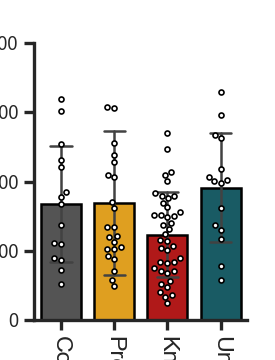

In [30]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
fig.set_size_inches(2.3,3)

In [31]:
sns.set(font_scale=1.2)

sns.barplot(data=df1, x=df1["Group"], y=df1["chao1"], palette=colors, width=0.75, linewidth=1.5, errorbar=("sd"),
           capsize=0.4, edgecolor="Black", errwidth=1.5)

sns.swarmplot(x=df1["Group"], y=df1["chao1"], data=df1, color="white", size=3, ax=ax1, edgecolor="black", linewidth=1)

ax1.set_xlabel("",size=10)
ax1.set_ylabel("Chao1", size=13)
ax1.set_title("",size=15)
ax1.set(ylim=(0, 400))
plt.xticks(size=14, rotation=-90)
plt.yticks(size=11)

ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

plt.savefig("chao1-all.svg", bbox_inches='tight') 

## Taxa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.ticker as mtick
from matplotlib.ticker import FixedLocator, FixedFormatter

In [33]:
cmapL2 = colors.ListedColormap(['#e9e2b6','#F8BC24','#F58800','#266867','#1A4645','#661b6e','#000000'])

In [43]:
df = pd.read_csv('L2.csv') 

<IPython.core.display.Javascript object>


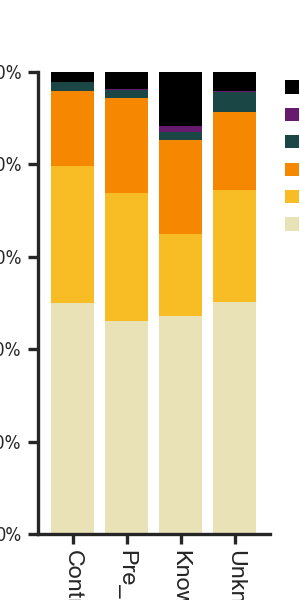

In [44]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmapL2, width=0.8, linewidth=0, figsize=(2.5,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=11.3, handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("L2.svg", bbox_inches='tight') 

In [2]:
cmap1 = colors.ListedColormap(['#06bcc1', '#ebdca0', '#f4edea', '#f4e409', '#eeba0b', 
                               '#f28f3b', '#b44b2e', '#d87b0a', '#ffa29b', '#fb6376', 
                               '#95527b', '#6d2938', '#845b3c', '#b47b54', '#c3a8aa', 
                               '#bbc191', '#677423', '#386641', '#a7c957', '#000000'])

In [45]:
df = pd.read_csv('L5.csv') 

<IPython.core.display.Javascript object>


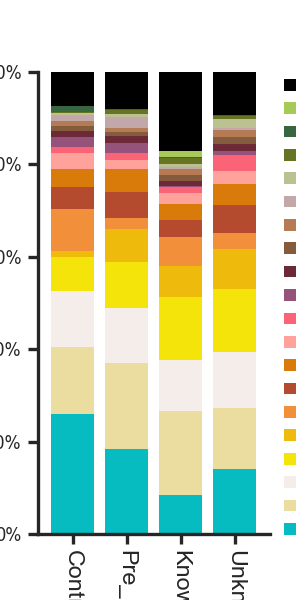

In [47]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap1, width=0.8, linewidth=0, figsize=(2.5,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=10, handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("L5.svg", bbox_inches='tight') 

In [51]:
cmap1 = colors.ListedColormap(['#b6e1f3','#1699a8','#aad356','#f9c908','#f25844','#c44065','#d9c097','#fff9d6','#a6e0b9','#00ada7',
                               '#183c59','#735a99','#ff4062','#ff9c98','#facdaa','#c8c9a8','#80b09b','#c5c7c7','#007792','#011519',
                               '#8c296b','#897800','#da8e00','#e05500','#920000','#4c5760','#93a8ac','#bab7d3','#a59e8c','#000000'])

cmap2 = colors.ListedColormap(['#fbd0c0','#f3b988','#e1c784','#87dfbb','#61eaec','#4ac2e6','#b3a3c5','#5ebbb6','#88e0bb','#a1ca8e',
                               '#e6efab','#cce8d6','#fff2cc','#fbc6d6','#fbc6d6','#ee9bb9','#f8cbad','#ffe699','#c5e0b4','#7bc19c',
                               '#6ba599','#3abce4','#1b8c95','#975f8c','#a76d5d','#d0a292','#d872a0','#cab4cc','#d9d9d9','#000000'])


cmap3 = colors.ListedColormap(['#12263a','#06bcc1','#c5d8d1','#f4edea','#f4d1ae','#f28f3b','#c8553d','#985277','#784863','#847e89',
                               '#afbfc0','#cce3de','#a7c957','#6a994e','#386641','#677423','#bbc191','#e8e0d0','#b47b54','#845b3c',
                               '#bfa4a4','#e6c0c3','#ffa29b','#fb6376','#b44b2e','#d87b0a','#eeba0b','#f4e409','#ecf49e','#000000'])

In [52]:
df = pd.read_csv('L6.csv') 

<IPython.core.display.Javascript object>


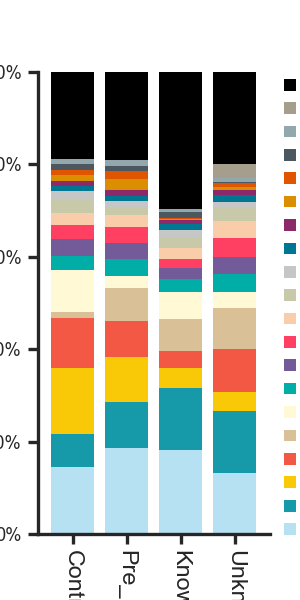

In [53]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap1, width=0.8, linewidth=0, figsize=(2.5,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=10, handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("L6.svg", bbox_inches='tight') 

In [54]:
df = pd.read_csv('L7.csv') 

<IPython.core.display.Javascript object>


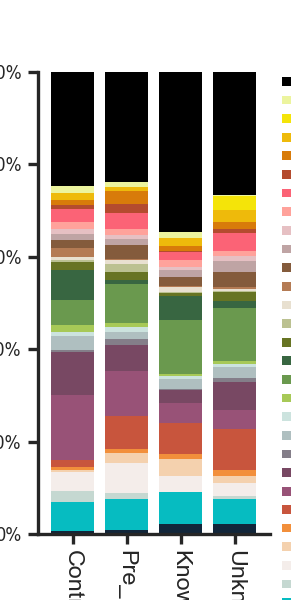

In [61]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap3, width=0.8, linewidth=0, figsize=(2.5,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=7.5, handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("L7.svg", bbox_inches='tight') 

## Sub Taxa

In [3]:
cd C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Visualization\Sub-taxa

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Visualization\Sub-taxa


In [11]:
df = pd.read_csv('HbA1C-group.csv') 

<IPython.core.display.Javascript object>


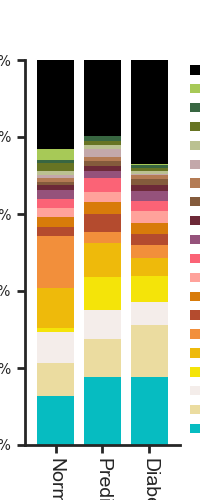

In [12]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap1, width=0.8, linewidth=0, figsize=(2,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=9.5,handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("HbA1C-group.svg", bbox_inches='tight') 

In [13]:
df = pd.read_csv('FBS-group.csv') 

<IPython.core.display.Javascript object>


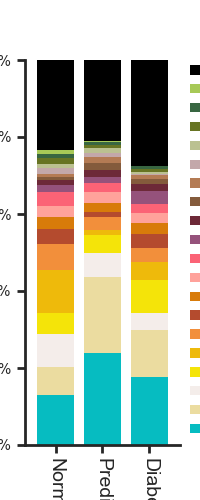

In [14]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap1, width=0.8, linewidth=0, figsize=(2,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=9.5,handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("FBS-group.svg", bbox_inches='tight') 

In [17]:
df = pd.read_csv('Metformin-group.csv')

<IPython.core.display.Javascript object>


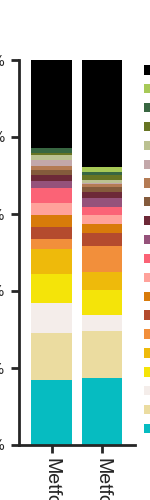

In [18]:
%matplotlib nbagg
sns.set_style("white")

df2=np.transpose(df)
df3=df2.rename(columns=df2.iloc[0])
df4=df3.drop(df3.index[0])
df5=pd.DataFrame(df4 * 100)
ax=df5.plot.bar(stacked=True, cmap=cmap1, width=0.8, linewidth=0, figsize=(1.5,5))

ax.set_xlabel("",size=14)
ax.set_ylabel("Relative abundance", size=15)
ax.set_title("",size=17, position=(0.5,1.02))
ax.set(ylim=(0, 100))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, width=2)

sns.set(font_scale=1.0)
plt.xticks(rotation=-90,size=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=9.5,handlelength=0.75,
           facecolor="white", edgecolor="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.savefig("Metformin-group.svg", bbox_inches='tight') 